<a href="https://colab.research.google.com/github/kapibara3chi/Correspondence_Analysis/blob/main/Correspondence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install mca
!pip install matplotlib
!pip install japanize-matplotlib
!pip install prince

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6010 sha256=b9ee79c4cbc8661fb31edb1f05b0a46e141760c2343f52dc71c5e08b8da560cd
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7bbd96d17f693ef255975367720f8f8f18a8e81e24d059692e78cff0006ac73f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.9 MB/s eta 0:00:00


  性別    趣味
0  男    音楽
1  男  スポーツ
2  未    読書
3  未    音楽
4  女    読書
5  女    映画
趣味  スポーツ  映画  読書  音楽
性別                  
女      0   1   1   0
未      0   0   1   1
男      1   0   0   1
[[ 1.06066017e+00 -3.53553391e-01]
 [-1.66533454e-16  7.07106781e-01]
 [-1.06066017e+00 -3.53553391e-01]]
[[-1.22474487 -0.70710678]
 [ 1.22474487 -0.70710678]
 [ 0.61237244  0.35355339]
 [-0.61237244  0.35355339]]
----------
[ 1.06066017e+00 -1.66533454e-16 -1.06066017e+00]
[-0.35355339  0.70710678 -0.35355339]
----------
[-1.22474487  1.22474487  0.61237244 -0.61237244]
[-0.70710678 -0.70710678  0.35355339  0.35355339]


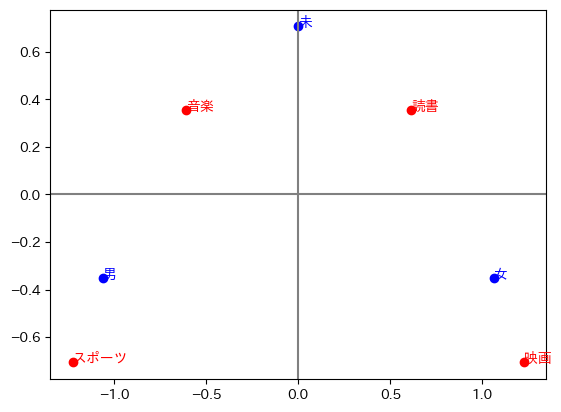

In [25]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt
import japanize_matplotlib

# クロス集計表の作成
data = pd.DataFrame({
    "性別": ["男", "男", "未", "未", "女", "女"],
    "趣味": ["音楽", "スポーツ", "読書", "音楽", "読書", "映画"]
})
print(data)


# df = pd.read_csv("ice_cream.csv", index_col=0)
# print(df)
#cross tableの作成
table = pd.crosstab(data["性別"], data["趣味"])
print(table)



# 対応分析の実行
mca_counts = mca.MCA(table,benzecri=False)
rows = mca_counts.fs_r(N=2) # 行の座標
cols = mca_counts.fs_c(N=2) # 列の座標

# 散布図の描画
print(rows)
print(cols)
print("-"*10)
print(rows[:, 0])
print(rows[:, 1])
print("-"*10)
print(cols[:, 0])
print(cols[:, 1])
plt.scatter(rows[:, 0], rows[:, 1], c="blue") # 行のプロット
plt.scatter(cols[:, 0], cols[:, 1], c="red") # 列のプロット
plt.axhline(0, color="gray") # 水平軸
plt.axvline(0, color="gray") # 垂直軸

# ラベルの付与
for label, x, y in zip(table.index, rows[:, 0], rows[:, 1]):
    plt.annotate(label, xy=(x, y), c="blue") # 行のラベル
for label, x, y in zip(table.columns, cols[:, 0], cols[:, 1]):
    plt.annotate(label, xy=(x, y), c="red") # 列のラベル

plt.show() # グラフの表示

In [18]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt
import japanize_matplotlib

# クロス集計表の作成
df = pd.DataFrame({
    "性別": ["男", "女", "男", "女", "男"],
    "年齢": ["20代", "30代", "40代", "20代", "30代"],
    "趣味": ["スポーツ", "読書", "映画", "音楽", "スポーツ"]
})
ct = pd.crosstab(df["性別"], df["趣味"])
print(ct)

# mcaでデータを加工
mca_counts = mca.MCA(ct, benzecri=False)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

print(rows)
print(cols)
print(rows[:, 0])
print(rows[:, 1])
# matplotlibでデータを可視化
fig, ax = plt.subplots(figsize=(8, 8))

# 行の処理
ax.scatter(rows[:, 0], rows[:, 1], c="pink", marker="o", s=200)
# ax.scatter(rows[0], rows[1], c="pink", marker="o", s=200)
labels = ct.index.values
# for label, x, y in zip(labels, rows[:, 0], rows[:, 1]):
for label, x, y in zip(labels, rows[0], rows[1]):
    ax.annotate(label, xy=(x, y), fontsize=15)

# 列の処理
ax.scatter(cols[:, 0], cols[:, 1], c="skyblue", marker="s", s=200)
# ax.scatter(cols[0], cols[1], c="skyblue", marker="s", s=200)
labels = ct.columns.values
# for label, x, y in zip(labels, cols[:, 0], cols[:, 1]):
for label, x, y in zip(labels, cols[0], cols[ 1]):
    ax.annotate(label, xy=(x, y), fontsize=15)

# 原点（0,0）を引く
ax.axhline(0, color="gray")
ax.axvline(0, color="gray")
plt.show()

Category2  X  Y
Category1      
A          4  0
B          0  4
[[-1.]
 [ 1.]]
[[-1.]
 [ 1.]]
[-1.  1.]


IndexError: ignored

In [24]:
import pandas as pd
from prince import CA
import seaborn as sns
import matplotlib.pyplot as plt

# サンプルデータを作成
data = {
    'Category1': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Count': [10, 15, 13, 20, 7, 9, 8, 12]
}

df = pd.DataFrame(data)

# カテゴリカルデータをダミー変数に変換
df_encoded = pd.get_dummies(df[['Category1', 'Category2']])

# 対応分析を実行
ca = CA(n_components=2)
ca.fit(df_encoded)

# 結果をプロット
sns.set(style="darkgrid")
sns.scatterplot(x=ca.column_coordinates_[0], y=ca.column_coordinates_[1], hue=df['Category1'])
plt.xlabel(f'Axis 1 ({ca.explained_inertia_[0]*100:.2f}%)')
plt.ylabel(f'Axis 2 ({ca.explained_inertia_[1]*100:.2f}%)')
plt.title('Correspondence Analysis')
plt.show()


/usr/local/lib/python3.10/dist-packages/prince/ca.py:98: RuntimeWarning: invalid value encountered in divide
  sparse.diags(self.row_masses_.values)
/usr/local/lib/python3.10/dist-packages/prince/ca.py:113: RuntimeWarning: invalid value encountered in divide
  sparse.diags(self.col_masses_.values)


AttributeError: ignored

  性別    趣味
0  男  スポーツ
1  女    読書
2  男    映画
3  女    音楽
4  男  スポーツ
趣味  スポーツ  映画  読書  音楽
性別                  
女      0   0   1   1
男      2   1   0   0


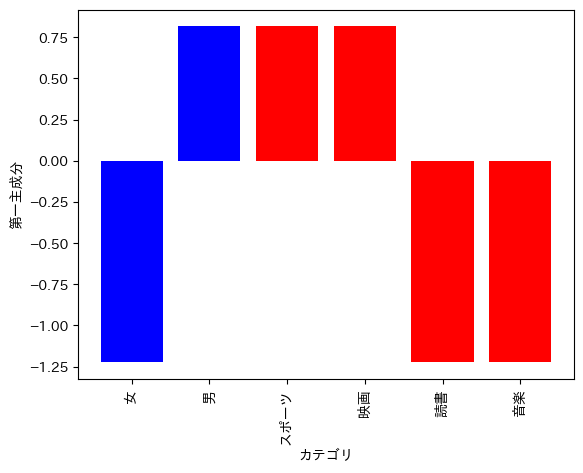

In [19]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt
import japanize_matplotlib

# クロス集計表の作成
df = pd.DataFrame({
    "性別": ["男", "女", "男", "女", "男"],
    "趣味": ["スポーツ", "読書", "映画", "音楽", "スポーツ"]
})
print(df)

table = pd.crosstab(df["性別"], df["趣味"])
print(table)

# 対応分析の実行
mca_counts = mca.MCA(table,benzecri=False)
rows = mca_counts.fs_r(N=2) # 行の座標
cols = mca_counts.fs_c(N=2) # 列の座標

# 棒グラフの描画
plt.bar(table.index, rows[:, 0], color="blue") # 行のプロット
plt.bar(table.columns, cols[:, 0], color="red") # 列のプロット

# ラベルの付与
plt.xticks(ticks=range(len(table.index) + len(table.columns)), labels=list(table.index) + list(table.columns), rotation=90)
plt.xlabel("カテゴリ")
plt.ylabel("第一主成分")

plt.show() # グラフの表示
